# Libraries

In [1]:
# General libraries for scientific computation
import numpy as np
import pandas as pd
import os
import warnings

# Graphic libraries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import itertools
import plotly.plotly as py
import plotly.graph_objs as go

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model validation
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Feature extraction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Other tools
from sklearn.pipeline import Pipeline
import time
#import string

# Visualize decision-tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from IPython.display import display
import pydotplus


from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
from IPython.display import Image
%matplotlib inline

# General funcions

- #### Plot confusion matrix

In [3]:
# This code has been take from the official documentation of scikit-learn and it was modified
# for the porpuses of the present work
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.FormatStrFormatter('%.2f')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

- #### Plot Learning Curve

In [4]:
def func_learning_curve(est, X_train, y_train, save_result=False):
    train_sizes, train_scores, test_scores = learning_curve(estimator=est, X=X_train, y=y_train,
                                               train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--',
             marker='s', markersize=5, label='validation accuracy')

    plt.fill_between(train_sizes, test_mean + test_std,
                     test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.0, 1.2])
    plt.tight_layout()

    if(save_result):
        plt.savefig('./../Results/learning_curve.png', dpi=300)

    plt.show()

- #### Plot Validation Curve

In [5]:
def func_validation_curve(est, X_train, y_train, param_name, param_range, scale=True, save_result=False):
    train_scores, test_scores = validation_curve(estimator=est, X=X_train, y=y_train, param_name=param_name, 
                                                     param_range=param_range, cv=10, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(param_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    if(scale):
        plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter ' + param_name)
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.2])
    plt.tight_layout()
    
    if(save_result):
        plt.savefig('./../Results/validation_curve.png', dpi=300)
    
    plt.show()

# Dataset (Vehicle silhouettes)

link: http://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29

In [6]:
file = './../Data/metadata_vehicles.txt'
metadata = pd.read_table(file, sep=',', engine='python', header=0)

print('The model has', metadata.shape[0]-1, 'columns')
metadata

The model has 18 columns


,Original variable name,Formula,Column name in the model
0,COMPACTNESS,(average perim)**2/area,compactness
1,CIRCULARITY,(average radius)**2/area,circularity
2,DISTANCE CIRCULARITY,area/(av.distance from border)**2,distance_circularity
3,RADIUS RATIO,(max.rad-min.rad)/av.radius,radius_ratio
4,PR.AXIS ASPECT RATIO,(minor axis)/(major axis),pr_axis_aspect_ratio
5,MAX.LENGTH ASPECT RATIO,(length perp. max length)/(max length),max_length_aspect_ratio
6,SCATTER RATIO,(inertia about minor axis)/(inertia about majo...,scatter_ratio
7,ELONGATEDNESS,area/(shrink width)**2,elongatedness
8,PR.AXIS RECTANGULARITY,area/(pr.axis length*pr.axis width),pr_axis_rectangularity
9,MAX.LENGTH RECTANGULARITY,area/(max.length*length perp. to this),max_length_rectangularity


In [7]:
directory = './../Data/statlog-vehicle/'
vehicles = pd.DataFrame()

for f in os.listdir(directory):
    file = pd.read_table(directory+f, sep='\s', engine='python', header=None)
    vehicles = pd.concat([vehicles, file])

vehicles.columns = metadata['Column name in the model'].values
class_names=['bus', 'opel', 'saab', 'van']

In [8]:
# If the figure is not rendered, it could be seen in the link: https://plot.ly/~jaime9510/0
data = []
for col in vehicles.columns:
    data.append(  go.Box( y=vehicles[col], name=col, showlegend=False ) )

data.append( go.Scatter( x = vehicles.columns, y = vehicles.mean(), mode='lines', name='mean' ) )

# IPython notebook
py.iplot(data, filename='pandas-box-plot')
#url = py.plot(data, filename='pandas-box-plot')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jaime9510/0 or inside your plot.ly account where it is named 'pandas-box-plot'


In [9]:
vehicles.describe().to_csv(path_or_buf='./../Results/basic_statistics.csv', decimal=',')
vehicles.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance1,scaled_variance2,scaled_radius_of_gyration,skewness_about1,skewness_about2,kurtosis_about1,kurtosis_about2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
vehicles['vehicle'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: vehicle, dtype: int64

# Preprocessing

### Label decoding

In [11]:
class_label = {label: idx for idx, label in enumerate(np.unique(vehicles['vehicle']))}
class_label

{'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}

In [12]:
vehicles.ix[:,18] = vehicles.ix[:,18].map(class_label)
print(vehicles.shape)
vehicles.head()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance1,scaled_variance2,scaled_radius_of_gyration,skewness_about1,skewness_about2,kurtosis_about1,kurtosis_about2,hollows_ratio,vehicle
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


### Train - Test split

In [13]:
X, y = vehicles.iloc[:, :-1].values, vehicles.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
print('X_train size', X_train.shape[0], '- X_test size', X_test.shape[0])

X_train size 676 - X_test size 170


### Standardize

In [15]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



# Feature Extraction

## Principal Component Analysis (PCA) 

In [16]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  5.22707606e-01,   1.63149930e-01,   1.11310400e-01,
         6.59376599e-02,   5.14170674e-02,   2.86630811e-02,
         1.88559971e-02,   1.28461762e-02,   8.62094823e-03,
         5.16152894e-03,   3.58426651e-03,   2.60894632e-03,
         1.95831112e-03,   1.18407226e-03,   9.05793574e-04,
         7.22472207e-04,   3.45196955e-04,   2.05466006e-05])

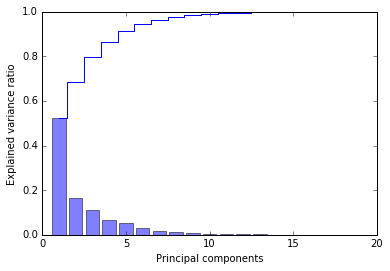

In [17]:
plt.bar(range(1, 19), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('./../Results/PCA.png', dpi=300)
plt.show()

In [63]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_std)
print('%', pca.explained_variance_ratio_)
print('Explain variance ratio with 9 components', sum(pca.explained_variance_ratio_))

% [ 0.52270761  0.16314993  0.1113104   0.06593766  0.05141707  0.02866308
  0.018856    0.01284618  0.00862095]
Explain variance ratio with 9 components 0.983508865514


In [19]:
X_test_pca = pca.transform(X_test_std)

## Linear Discriminant Analysis (LDA)

In [20]:
# Model initialization
lda = LDA(n_components=None)

# Cross-validation (10 folds)
scores = cross_val_score(estimator=lda,
                         X=X_train_std,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

# Results
print('cross-validation accuracy scores: %s' % scores)
print('\ncross-validation general accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

cross-validation accuracy scores: [ 0.8115942   0.72463768  0.75362319  0.7826087   0.79411765  0.71641791
  0.85074627  0.76119403  0.81818182  0.76923077]

cross-validation general accuracy: 0.778 +/- 0.040


In [21]:
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [22]:
print('Test accuracy: %.4f' % lda.score(X_test_std, y_test))

Test accuracy: 0.7588


### Model analysis

- ##### Confusion matrix

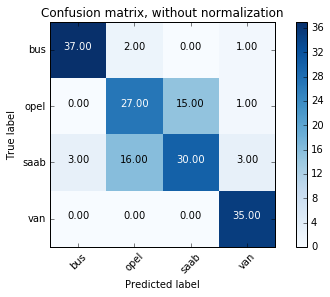

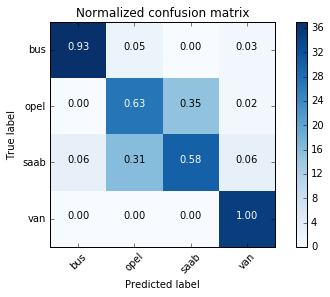

In [23]:
y_pred = lda.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Data for the model

In [24]:
# (X_train_std, X_test_std) (X_train_pca, X_test_pca); (X_train_lda, X_test_lda)

X_train_model = X_train_std
X_test_model = X_test_std

# Logistic Regression

Only this model will be implement in two ways. The first one in which it is tested manually the cross-validation process and results; and the second one, that automates the process to find the best parameters for the model using also cross-validation

#### Cross-validation

In [64]:
lr = LogisticRegression(C=100.0, random_state=0)

kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_model, y_train)
#kfold = KFold(n_splits=10,random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    lr.fit(X_train_model[train], y_train[train])
    score = lr.score(X_train_model[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Accuracy: %.3f' % (k+1, score))
    
print('\nCross-validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Accuracy: 0.826
Fold: 2, Accuracy: 0.768
Fold: 3, Accuracy: 0.797
Fold: 4, Accuracy: 0.812
Fold: 5, Accuracy: 0.765
Fold: 6, Accuracy: 0.746
Fold: 7, Accuracy: 0.851
Fold: 8, Accuracy: 0.761
Fold: 9, Accuracy: 0.818
Fold: 10, Accuracy: 0.769

Cross-validation accuracy: 0.791 +/- 0.033


In [26]:
lr.fit(X_train_model, y_train)
print(X_train_model.shape)
print('Test accuracy: %.4f' % lr.score(X_test_model, y_test))

(676, 18)
Test accuracy: 0.7765


#### Pipelining

In [27]:
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=0))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'lr__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_model, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.794378698225
{'lr__C': 10.0}


In [28]:
pd.DataFrame(gs.cv_results_).to_csv(path_or_buf='./../Results/lr_results.csv', decimal=',')

In [29]:
c_lr = gs.best_params_.get('lr__C', 1)
lr = LogisticRegression(C=c_lr, random_state=0)
lr.fit(X_train_model, y_train)

print('Train accuracy: %.4f' % lr.score(X_train_model, y_train))
print('Test accuracy: %.4f' % lr.score(X_test_model, y_test))

Train accuracy: 0.8225
Test accuracy: 0.7706


### Model analysis

- ##### Confusion matrix

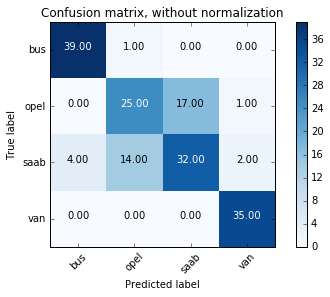

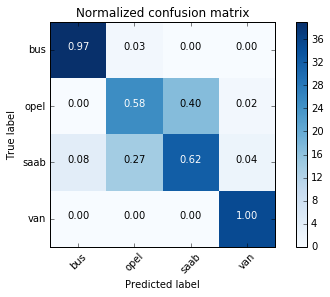

In [30]:
y_pred = lr.predict(X_test_model)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

- ##### Learning Curve

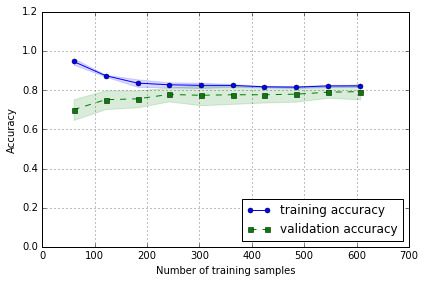

In [31]:
func_learning_curve(lr, X_train_model, y_train, True)

- ##### Validation Curve

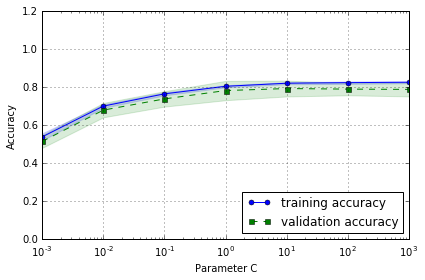

In [32]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_name = 'C'
func_validation_curve(lr, X_train_model, y_train, param_name, param_range, True, True)

# Tree-Based Methods

## Decision Trees

In [33]:
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=0))])

param_range = [3, 5, 7, 10, 50, 100]

param_grid = [{'dt__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_dt, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_model, y_train)
print('Best score: %.4f' % gs.best_score_)
print('Best params: %s' % gs.best_params_)

Best score: 0.7012
Best params: {'dt__max_depth': 50}


In [34]:
pd.DataFrame(gs.cv_results_).to_csv(path_or_buf='./../Results/dt_results.csv', decimal=',')

In [35]:
md = gs.best_params_.get('dt__max_depth', None)

tree = DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=0)
tree.fit(X_train_model, y_train)

print('Train accuracy: %.4f' % tree.score(X_train_model, y_train))
print('Test accuracy: %.4f' % tree.score(X_test_model, y_test))

Train accuracy: 1.0000
Test accuracy: 0.6529


### Model analysis

- ##### Confusion matrix

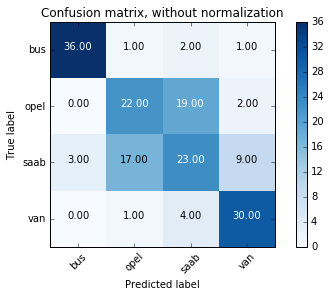

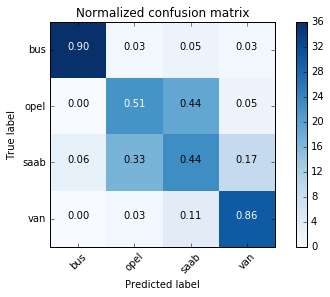

In [36]:
y_pred = tree.predict(X_test_model)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

- ##### Tree graph

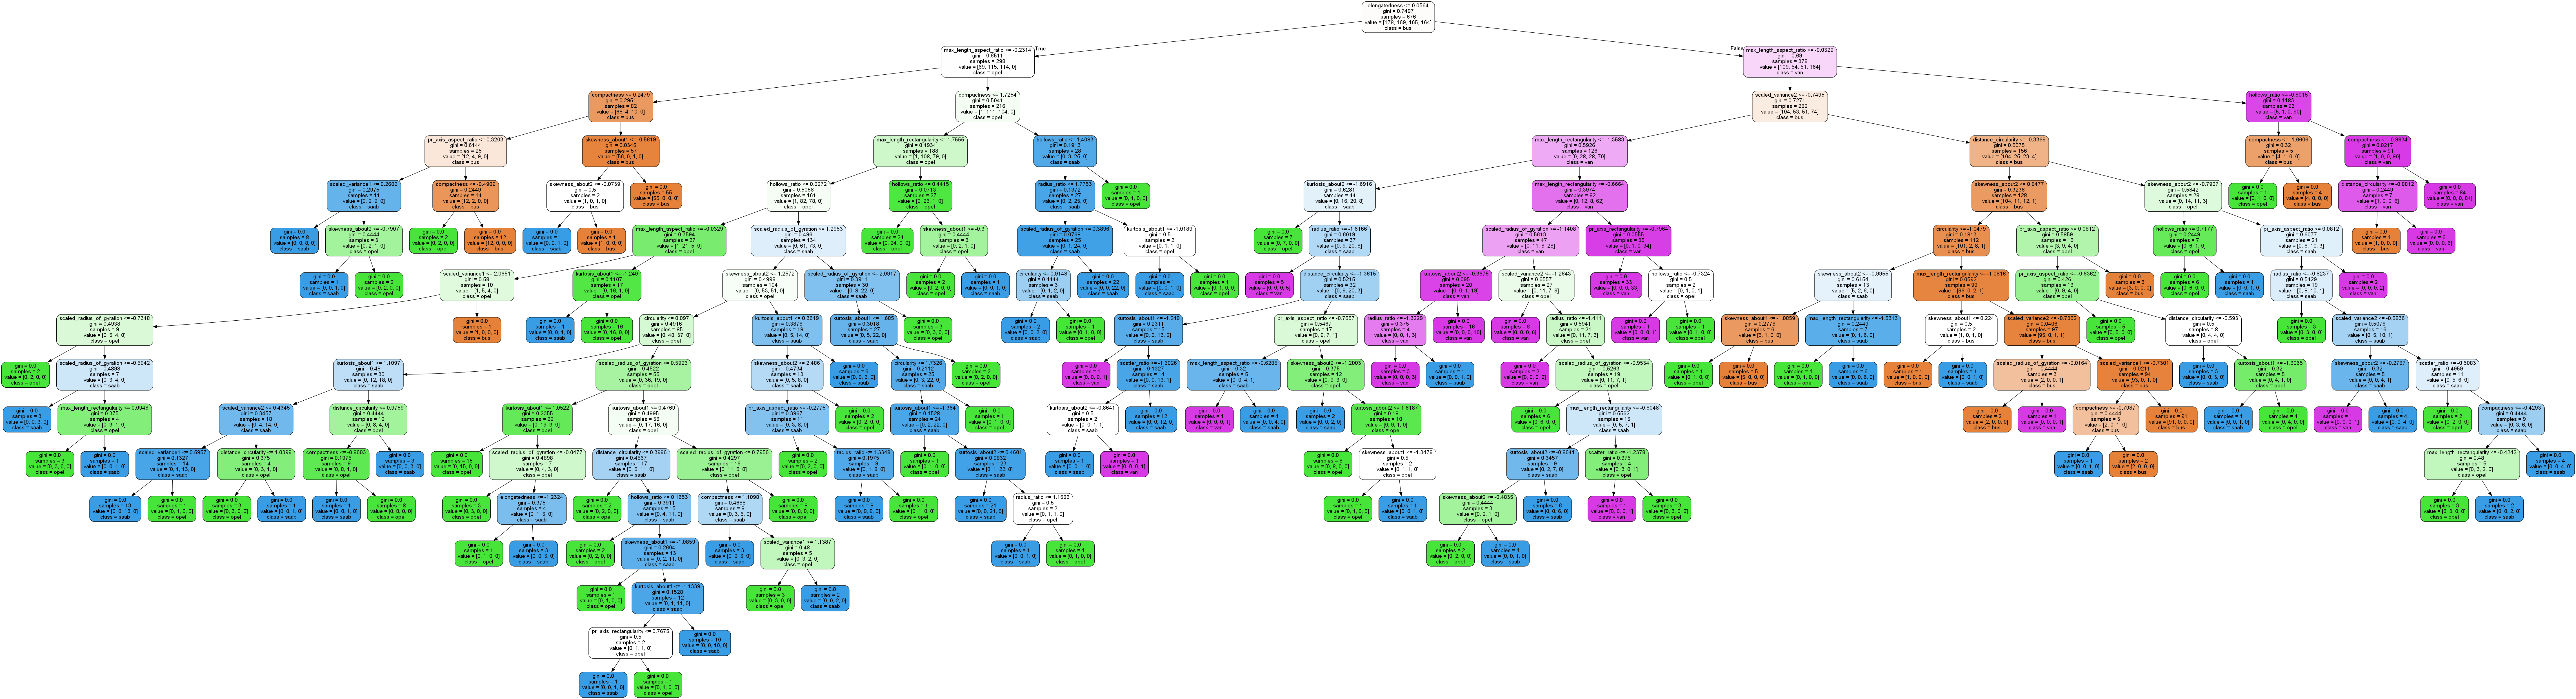

In [37]:
dot_data = export_graphviz(tree, out_file=None,
                feature_names = metadata['Column name in the model'].values,
                class_names=['bus', 'opel', 'saab', 'van'],
                filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data) 
print(graph)
display(Image(graph.create_png()))


- ##### Learning Curve

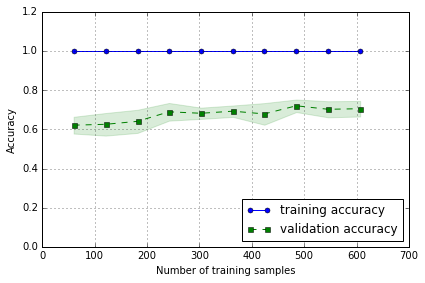

In [38]:
func_learning_curve(tree, X_train_model, y_train, True)

- ##### Validation Curve

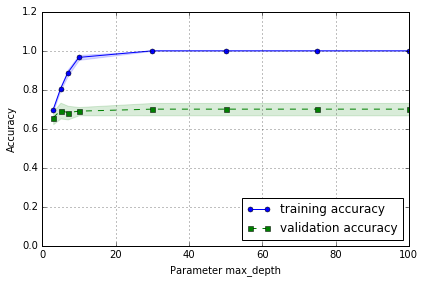

In [39]:
param_range = [3, 5, 7, 10, 30, 50, 75, 100]
param_name = 'max_depth'
func_validation_curve(tree, X_train_model, y_train, param_name, param_range, False, True)

## Random Forest

In [40]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(criterion='gini', random_state=1))])

param_range = [3, 5, 7, 10, 50, 100, 300, 500, 1000]

param_grid = [{'rf__n_estimators': param_range}]

gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_model, y_train)

print('Best score: %.4f' % gs.best_score_)
print('Best params: %s' % gs.best_params_)

Best score: 0.7692
Best params: {'rf__n_estimators': 500}


In [41]:
pd.DataFrame(gs.cv_results_).to_csv(path_or_buf='./../Results/rf_results.csv', decimal=',')

In [42]:
ne = gs.best_params_.get('rf__n_estimators', None)
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=ne, 
                                random_state=1,
                                n_jobs=-1)
forest.fit(X_train_model, y_train)

print('Train accuracy: %.4f' % forest.score(X_train_model, y_train))
print('Test accuracy: %.4f' % forest.score(X_test_model, y_test))

Train accuracy: 1.0000
Test accuracy: 0.6882


### Model analysis

- ##### Confusion matrix

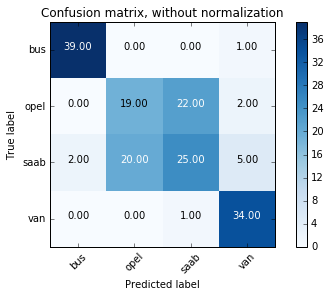

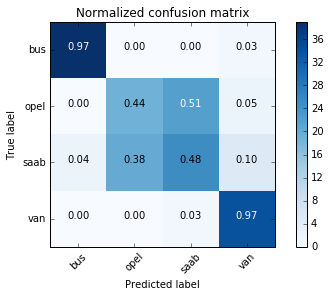

In [43]:
y_pred = forest.predict(X_test_model)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

- ##### Learning curve

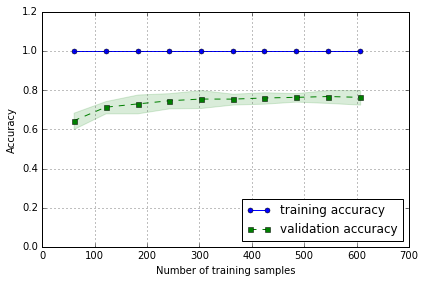

--- 63.94282341003418 seconds ---


In [44]:
start_time = time.time()
func_learning_curve(forest, X_train_model, y_train, True)
print("--- %s seconds ---" % (time.time() - start_time))

- ##### Validation curve

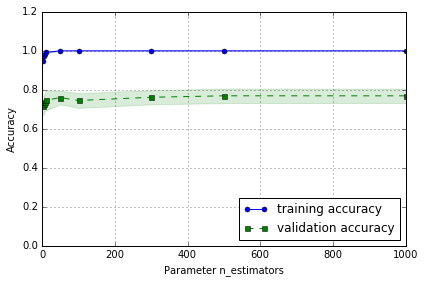

In [45]:
param_range = [3, 5, 7, 10, 50, 100, 300, 500, 1000]
param_name = 'n_estimators'
func_validation_curve(forest, X_train_model, y_train, param_name, param_range, False, True)

# Support Vector Machines (SVM)

### Linear kernel

In [46]:
pipe_svm = Pipeline([('svm', SVC(random_state=1))])

param_range_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svm__C': param_range_C, 
               'svm__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_model, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.809171597633
{'svm__C': 10.0, 'svm__kernel': 'linear'}


In [47]:
pd.DataFrame(gs.cv_results_).to_csv(path_or_buf='./../Results/svm_linear_results.csv', decimal=',')

In [48]:
c = gs.best_params_.get('svc__C', 1)
svm = SVC(kernel='linear', C=c, random_state=1)
svm.fit(X_train_model, y_train)

print('Train accuracy: %.4f' % svm.score(X_train_model, y_train))
print('Test accuracy: %.4f' % svm.score(X_test_model, y_test))

Train accuracy: 0.8299
Test accuracy: 0.7882


### Model analysis

- ##### Confusion matrix

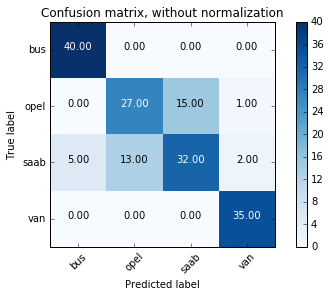

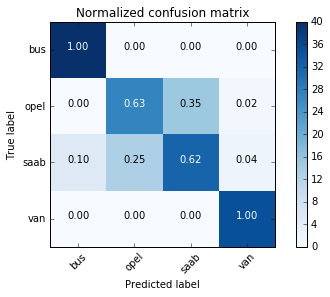

In [49]:
y_pred = svm.predict(X_test_model)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

- ##### Learning curve

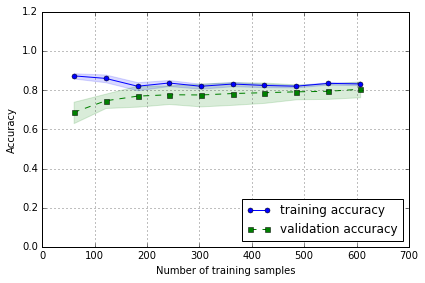

--- 2.590972900390625 seconds ---


In [50]:
start_time = time.time()
func_learning_curve(svm, X_train_model, y_train, True)
print("--- %s seconds ---" % (time.time() - start_time))

- ##### Validation curve

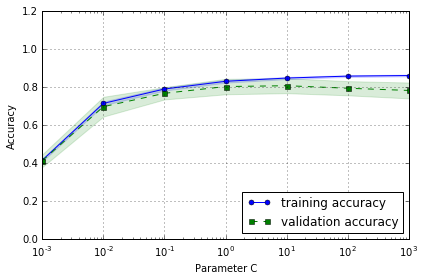

In [51]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_name = 'C'
func_validation_curve(svm, X_train_model, y_train, param_name, param_range, True, True)

### Kernel rbf

In [52]:
pipe_svm_rbf = Pipeline([('svm_rbf', SVC(random_state=1))])

param_range_gamma = [0.001, 0.01, 0.1, 1.0, 10.0]
param_range_c = [0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svm_rbf__C': param_range_c, 
                  'svm_rbf__gamma': param_range_gamma, 
                  'svm_rbf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svm_rbf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_model, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.850591715976
{'svm_rbf__C': 1000.0, 'svm_rbf__gamma': 0.01, 'svm_rbf__kernel': 'rbf'}


In [53]:
pd.DataFrame(gs.cv_results_).to_csv(path_or_buf='./../Results/svm_rbf_results.csv', decimal=',')

In [54]:
c_rbf = gs.best_params_.get('svm_rbf__C', 1)
g = gs.best_params_.get('svm_rbf__gamma', 1)

svm_rbf = SVC(kernel='rbf', random_state=0, gamma=g, C=c_rbf)
svm_rbf.fit(X_train_model, y_train)

print('Train accuracy: %.4f' % svm_rbf.score(X_train_model, y_train))
print('Test accuracy: %.4f' % svm_rbf.score(X_test_model, y_test))

Train accuracy: 0.9675
Test accuracy: 0.8176


### Model analysis

- ##### Confusion matrix

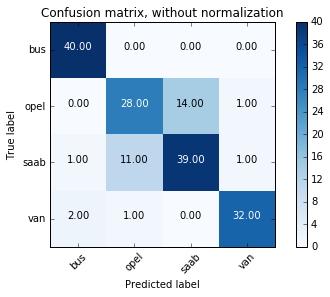

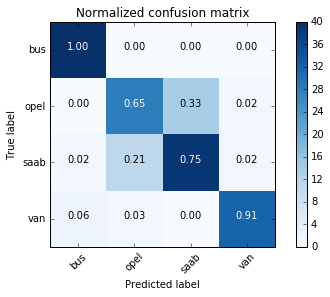

In [55]:
y_pred = svm_rbf.predict(X_test_model)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

- ##### Learning curve

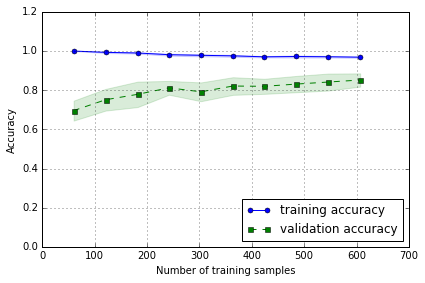

--- 2.815035343170166 seconds ---


In [56]:
start_time = time.time()
func_learning_curve(svm_rbf, X_train_model, y_train, True)
print("--- %s seconds ---" % (time.time() - start_time))

- ##### Validation curve

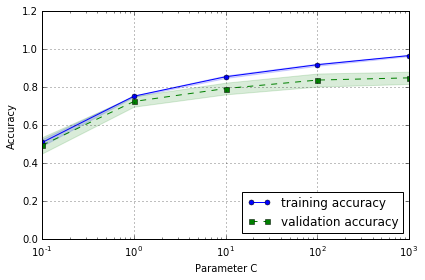

In [57]:
param_range = [0.1, 1.0, 10.0, 100.0, 1000.0]
param_name = 'C'
func_validation_curve(svm_rbf, X_train_model, y_train, param_name, param_range, True, True)

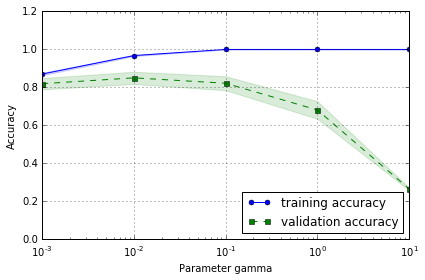

In [58]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0]
param_name = 'gamma'
func_validation_curve(svm_rbf, X_train_model, y_train, param_name, param_range, True, True)

# Feature importance

- #### Using Random Forest

In [59]:
rf_importance = pd.DataFrame(data=forest.feature_importances_, 
                             index=vehicles.ix[:,:-1].columns, columns=['Importance'])

rf_importance.sort_values(by=['Importance'], ascending=False)

,Importance
max_length_aspect_ratio,0.114521
scaled_variance2,0.083855
max_length_rectangularity,0.078172
distance_circularity,0.072392
elongatedness,0.069020
scatter_ratio,0.065322
scaled_variance1,0.056362
compactness,0.055485
pr_axis_aspect_ratio,0.052578
hollows_ratio,0.049818


- #### L1-Regularization

In [60]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_model, y_train)
print('Training accuracy:', lr.score(X_train_model, y_train))
print('Test accuracy:', lr.score(X_test_model, y_test))

Training accuracy: 0.751479289941
Test accuracy: 0.7


In [61]:
p = pd.DataFrame(lr.coef_)
vehicles.columns[p.columns[(p == 0).all()]]

Index(['circularity', 'pr_axis_rectangularity', 'scaled_variance1'], dtype='object')

In [62]:
p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.365629,0.0,-1.415604,0.000000,0.634613,-0.958627,0.00000,-1.551838,0.0,0.000000,0.0,0.000000,0.307970,0.798280,-0.364016,0.000000,1.081848,-0.871242
1,-0.631398,0.0,0.101307,0.236338,-0.310897,0.000000,0.76818,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.904597,0.000000,0.087642,-0.335992,0.000000
2,0.433516,0.0,0.036654,0.694633,-0.417630,0.000000,0.00000,0.000000,0.0,-0.629101,0.0,0.000000,0.023623,-0.835847,0.271391,0.044521,-0.647308,0.000000
3,0.328968,0.0,0.000000,-0.188244,0.000000,0.278107,0.00000,2.327716,0.0,2.288480,0.0,-1.142821,-0.396819,0.000000,0.000000,-0.014801,0.000000,0.418770
